In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import add_constant

from sklearn.svm import SVC 

# 모델 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# grhpviz
from sklearn.tree import export_graphviz
import graphviz

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier


# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df_raw_meta = pd.read_csv("Data_OTT//movie_meta.csv", encoding="cp949")

In [5]:
df_raw = pd.read_csv("Data_OTT/movie_inventory.csv", encoding="cp949")

In [5]:
df_raw.head()

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,05-19-2005,140,PG-13,PG-13,7.5,...,George Lucas,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10
1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,2005,11-18-2005,157,PG-13,PG-13,7.7,...,Mike Newell,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10
2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",2005,12-09-2005,143,PG,PG,6.9,...,Andrew Adamson,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1
3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,2006,07-07-2006,151,PG-13,PG-13,7.3,...,Gore Verbinski,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1
4,I-1005,2015,tt0413300,Spider-Man 3,2007,05-04-2007,139,PG-13,PG-13,6.2,...,Sam Raimi,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   release_year       106 non-null    int64  
 5   release_date       106 non-null    object 
 6   runtime            106 non-null    int64  
 7   mpa_rating         106 non-null    object 
 8   mpa_rating_origin  106 non-null    object 
 9   imdb_score         106 non-null    float64
 10  votes              106 non-null    int64  
 11  reviews_users      106 non-null    int64  
 12  reviews_critics    106 non-null    int64  
 13  budget             106 non-null    int64  
 14  income_usa         106 non-null    int64  
 15  income_ww          106 non-null    int64  
 16  theater_opening    106 non

### 결측치 제거
- country_2, country_3,Genre_2, Genre_3에서 결측치 확인
- country관련 칼럼은 삭제 가능 (결측치가 너무 많다.)
- Genre관련 데이터는 결측치가 별로 없기에 "ETC"라는 데이터로 대체

In [7]:
df_raw.isnull().sum()

item_id               0
contract_year         0
movie_id              0
title                 0
release_year          0
release_date          0
runtime               0
mpa_rating            0
mpa_rating_origin     0
imdb_score            0
votes                 0
reviews_users         0
reviews_critics       0
budget                0
income_usa            0
income_ww             0
theater_opening       0
theater_total         0
country_1             0
country_2            67
country_3            92
studio                0
director              0
Genre_1               0
Genre_2               3
Genre_3              10
actor_1               0
actor_2               0
actor_3               0
contract_price        0
studio_score          0
price_class           0
dtype: int64

In [8]:
df_raw = df_raw.drop(["country_2", "country_3"], axis = 1)

In [9]:
df_raw["Genre_1"].unique()

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Biography', 'Drama',
       'Horror'], dtype=object)

In [10]:
df_raw["Genre_2"].unique()

array(['Adventure', 'Family', 'Drama', 'Crime', nan, 'Comedy', 'Sci-Fi',
       'Fantasy', 'Biography', 'Romance', 'Music', 'Thriller', 'Mystery',
       'Horror', 'Action'], dtype=object)

In [11]:
df_raw["Genre_3"].unique()

array(['Fantasy', 'Sci-Fi', 'Comedy', 'Family', nan, 'Drama', 'Sport',
       'Thriller', 'Mystery', 'Crime', 'Romance', 'History', 'Biography',
       'Adventure', 'Music'], dtype=object)

In [12]:
df_raw = df_raw.fillna("ETC")

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   release_year       106 non-null    int64  
 5   release_date       106 non-null    object 
 6   runtime            106 non-null    int64  
 7   mpa_rating         106 non-null    object 
 8   mpa_rating_origin  106 non-null    object 
 9   imdb_score         106 non-null    float64
 10  votes              106 non-null    int64  
 11  reviews_users      106 non-null    int64  
 12  reviews_critics    106 non-null    int64  
 13  budget             106 non-null    int64  
 14  income_usa         106 non-null    int64  
 15  income_ww          106 non-null    int64  
 16  theater_opening    106 non

In [15]:
df_raw.to_csv('movie_inventory_change.csv', index=False, encoding='cp949')

### 이상치 제거
- 이산형 13개
- 연속형 15개

### 연속형 데이터 이상치 확인 결과 
- income_ww, votes, theater_opening, reviews_user에서 이상치를 확인했다.
- 이상치 데이터를 세부적으로 살펴본 결과 income_ww에서 '아바타'가 매우 높은 수익률을 기록하고 있었다.
- 배트맨 '다크나이트'가 리뷰 수 및 리뷰에 참여한 고객의 수에서 높은 수치를 기록했다.
- 따라서 해당 데이터에서 이상치처럼 보였던 데이터에는 이상이 없는 것으로 확인되었다.'

- 단 theter_opening에서는 오류가 발생한 것을 확인할 수 있었다.
    - theater_total과 데이터를 확인했을 때 편차가 큰 것으로 나타났다.
    - 따라서 해당 편차를 고려해서 이상치에 새로운 값을 넣어주었다.


In [86]:
df_raw_1 = df_raw
df_raw_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   release_year       106 non-null    int64  
 5   release_date       106 non-null    object 
 6   runtime            106 non-null    int64  
 7   mpa_rating         106 non-null    object 
 8   mpa_rating_origin  106 non-null    object 
 9   imdb_score         106 non-null    float64
 10  votes              106 non-null    int64  
 11  reviews_users      106 non-null    int64  
 12  reviews_critics    106 non-null    int64  
 13  budget             106 non-null    int64  
 14  income_usa         106 non-null    int64  
 15  income_ww          106 non-null    int64  
 16  theater_opening    106 non

<AxesSubplot:>

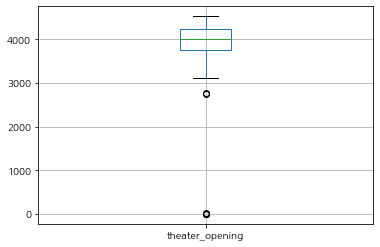

In [8]:
df_raw[["theater_opening"]].boxplot()

<AxesSubplot:>

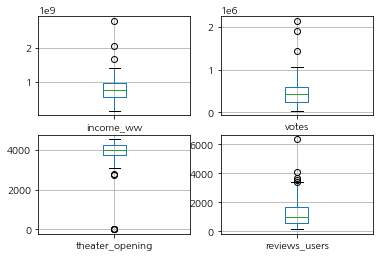

In [87]:
plt.subplot(221)
df_raw_1[["income_ww"]].boxplot(figs`ize = (40, 20))

plt.subplot(222)
df_raw_1[["votes"]].boxplot(figsize = (40, 20))

plt.subplot(223)
df_raw_1[["theater_opening"]].boxplot(figsize = (40, 20))

plt.subplot(224)
df_raw_1[["reviews_users"]].boxplot(figsize = (40, 20))

### reviews_users
- 영화 리뷰 수(고객)

In [88]:
df_raw_1.sort_values(by="reviews_users", ascending=False).head()

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
12,I-1013,2015,tt0468569,The Dark Knight,2008,07-18-2008,152,PG-13,PG-13,9.0,...,Christopher Nolan,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,2700,10,10
96,I-1097,2019,tt4154756,Avengers: Infinity War,2018,04-27-2018,149,PG-13,PG-13,8.5,...,Anthony Russo,Action,Adventure,Sci-Fi,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,2700,10,10
105,I-1106,2019,tt1477834,Aquaman,2018,12-21-2018,143,PG-13,PG-13,7.0,...,James Wan,Action,Adventure,Fantasy,Jason Momoa,Amber Heard,Willem Dafoe,2295,10,1
69,I-1070,2017,tt2975590,Batman v Superman: Dawn of Justice,2016,03-25-2016,151,PG-13,PG-13,6.5,...,Zack Snyder,Action,Adventure,Sci-Fi,Ben Affleck,Henry Cavill,Amy Adams,2295,10,1
25,I-1026,2015,tt1375666,Inception,2010,07-16-2010,148,PG-13,PG-13,8.8,...,Christopher Nolan,Action,Adventure,Sci-Fi,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,2700,10,10


### votes
- 리뷰를 작성한 유저 수

In [89]:
df_raw_1.sort_values(by="votes", ascending=False).head()

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
12,I-1013,2015,tt0468569,The Dark Knight,2008,07-18-2008,152,PG-13,PG-13,9.0,...,Christopher Nolan,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,2700,10,10
25,I-1026,2015,tt1375666,Inception,2010,07-16-2010,148,PG-13,PG-13,8.8,...,Christopher Nolan,Action,Adventure,Sci-Fi,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,2700,10,10
30,I-1031,2015,tt1345836,The Dark Knight Rises,2012,07-20-2012,164,PG-13,PG-13,8.4,...,Christopher Nolan,Action,Adventure,ETC,Christian Bale,Gary Oldman,Tom Hardy,2700,10,10
20,I-1021,2015,tt0499549,Avatar,2009,12-18-2009,162,PG-13,PG-13,7.8,...,James Cameron,Action,Adventure,Fantasy,Sam Worthington,Zoe Saldana,Sigourney Weaver,2700,10,10
41,I-1042,2015,tt2015381,Guardians of the Galaxy,2014,08-01-2014,121,PG-13,PG-13,8.1,...,James Gunn,Action,Adventure,Comedy,Chris Pratt,Zoe Saldana,Dave Bautista,2700,10,10


### income_ww
- 매출(전세계)

In [91]:
df_raw_1.sort_values(by="income_ww", ascending=False).head()

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
20,I-1021,2015,tt0499549,Avatar,2009,12-18-2009,162,PG-13,PG-13,7.8,...,James Cameron,Action,Adventure,Fantasy,Sam Worthington,Zoe Saldana,Sigourney Weaver,2700,10,10
96,I-1097,2019,tt4154756,Avengers: Infinity War,2018,04-27-2018,149,PG-13,PG-13,8.5,...,Anthony Russo,Action,Adventure,Sci-Fi,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,2700,10,10
52,I-1053,2016,tt0369610,Jurassic World,2015,06-12-2015,124,PG-13,PG-13,7.0,...,Colin Trevorrow,Action,Adventure,Sci-Fi,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,2295,10,1
47,I-1048,2016,tt2395427,Avengers: Age of Ultron,2015,05-01-2015,141,PG-13,PG-13,7.3,...,Joss Whedon,Action,Adventure,Sci-Fi,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,2295,10,1
94,I-1095,2019,tt1825683,Black Panther,2018,02-16-2018,134,PG-13,PG-13,7.3,...,Ryan Coogler,Action,Adventure,Sci-Fi,Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o,2295,10,1


### theater_opening

- 개봉 극장 수 이상해보임

In [90]:
cond = (df_raw_1["theater_opening"] ==1) | (df_raw_1["theater_opening"] ==4) | (df_raw_1["theater_opening"] ==25)

df_raw_1[cond]

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
38,I-1039,2015,tt2294629,Frozen,2013,11-27-2013,102,PG,PG,7.5,...,Chris Buck,Animation,Adventure,Comedy,Kristen Bell,Idina Menzel,Jonathan Groff,2700,10,10
44,I-1045,2015,tt2179136,American Sniper,2014,01-16-2015,133,R,R,7.3,...,Clint Eastwood,Action,Biography,Drama,Bradley Cooper,Kyle Gallner,Cole Konis,2295,10,1
66,I-1067,2016,tt1663202,The Revenant,2015,01-08-2016,156,R,R,8.0,...,Alejandro G. I,Action,Adventure,Biography,Leonardo DiCaprio,Tom Hardy,Domhnall Gleeson,2600,6,10
81,I-1082,2017,tt4846340,Hidden Figures,2016,01-06-2017,127,PG,PG,7.8,...,Theodore Melfi,Biography,Drama,History,Taraji P. Henson,Octavia Spencer,Janelle Mon e,2600,6,10


In [92]:
df_raw_1["total-opening"] = df_raw_1["theater_total"] - df_raw_1["theater_opening"]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1cdc504850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1cdacb3100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1cdb09ddc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1cdb60dac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1cdb60d1c0>],
 'means': []}

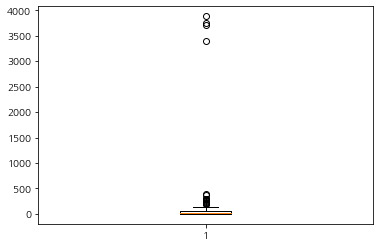

In [93]:
plt.boxplot(df_raw_1["total-opening"])

In [94]:
df_raw_1.sort_values(by="total-opening", ascending=False).head()

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,total-opening
44,I-1045,2015,tt2179136,American Sniper,2014,01-16-2015,133,R,R,7.3,...,Action,Biography,Drama,Bradley Cooper,Kyle Gallner,Cole Konis,2295,10,1,3881
38,I-1039,2015,tt2294629,Frozen,2013,11-27-2013,102,PG,PG,7.5,...,Animation,Adventure,Comedy,Kristen Bell,Idina Menzel,Jonathan Groff,2700,10,10,3741
66,I-1067,2016,tt1663202,The Revenant,2015,01-08-2016,156,R,R,8.0,...,Action,Adventure,Biography,Leonardo DiCaprio,Tom Hardy,Domhnall Gleeson,2600,6,10,3707
81,I-1082,2017,tt4846340,Hidden Figures,2016,01-06-2017,127,PG,PG,7.8,...,Biography,Drama,History,Taraji P. Henson,Octavia Spencer,Janelle Mon e,2600,6,10,3391
58,I-1059,2016,tt1398426,Straight Outta Compton,2015,08-14-2015,147,R,R,7.9,...,Biography,Drama,History,O'Shea Jackson Jr.,Corey Hawkins,Jason Mitchell,2600,6,10,385


- American Sniper, Frozen, The Revenant, Hidden Figures 데이터에서 theater_opening과 theater_total에서 차이점이 존재하는 것 같다.

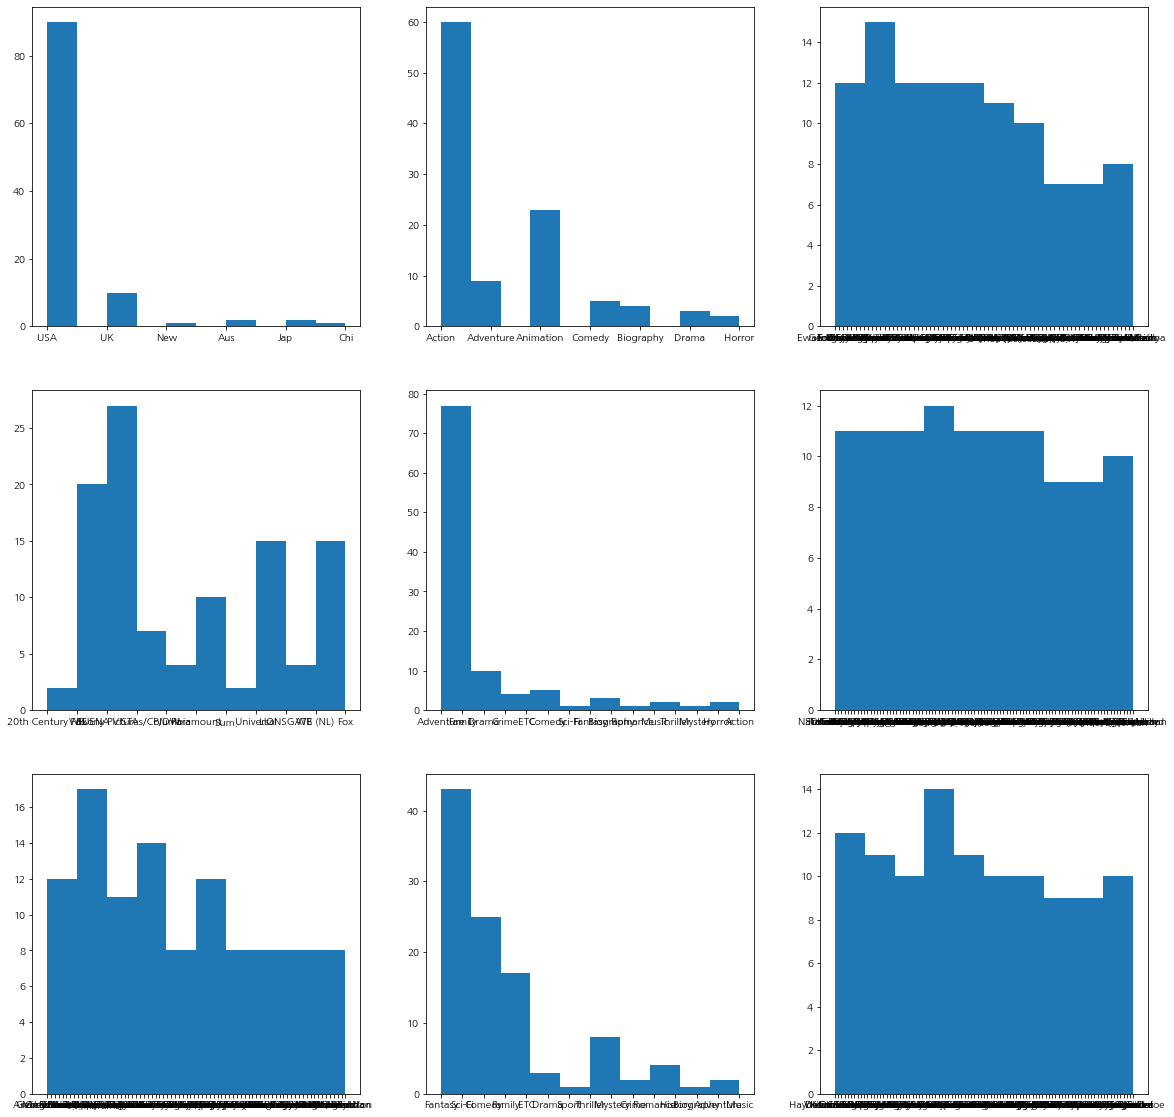

In [102]:
bin_ls = ["country_1", "studio", "director", "Genre_1", "Genre_2", "Genre_3",
          "actor_1", "actor_2", "actor_3"]

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
i, j = 0, 0

for col in bin_ls:
    ax[i, j].hist(df_raw_1[col])
    i += 1
    if i == 3:
        i = 0
        j += 1

### 이산형 데이터 정리
- 영화배우, 영화 감독 데이터의 경우 전체적으로 분포가 다양하게 나타나고 있다.
- 장르의 경우 Action, Adventure의 경우가 주를 이루는 것을 확인할 수 있었다.
- 단 MPA등급의 경우 데이터가 아예 동일한 형태를 띠고 있기 때문에 추후 작업 시 해당 칼럼 중 하나를 제거하고 진행하도록 하겠다.

(array([67.,  0.,  0., 23.,  0.,  0., 13.,  0.,  0.,  3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

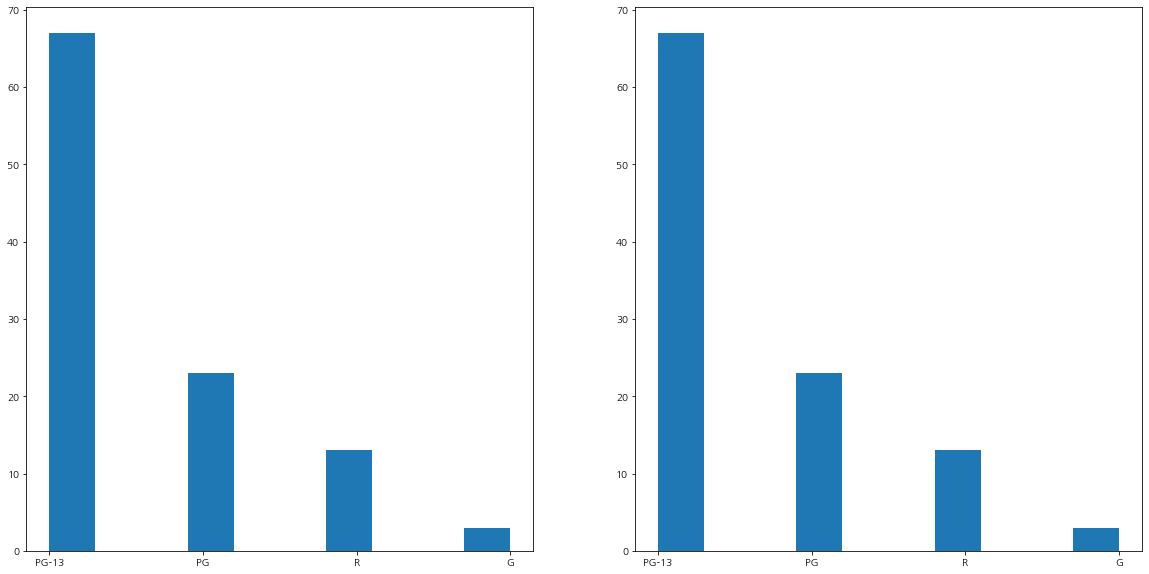

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].hist(df_raw_1['mpa_rating'])
ax[1].hist(df_raw_1['mpa_rating_origin'])

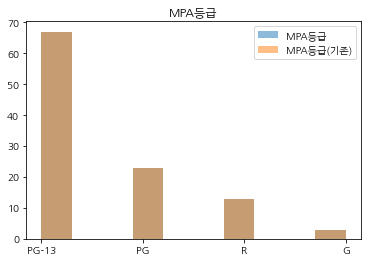

In [109]:
plt.hist(df_raw_1['mpa_rating'], label = "MPA등급", alpha = 0.5)
plt.hist(df_raw_1['mpa_rating_origin'], label = "MPA등급(기존)", alpha = 0.5)
plt.title("MPA등급")
plt.legend()

In [111]:
df_raw_1[df_raw_1["mpa_rating"]=="R"]

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,total-opening
15,I-1016,2015,tt1119646,The Hangover,2009,06-05-2009,100,R,R,7.7,...,Comedy,ETC,ETC,Bradley Cooper,Ed Helms,Zach Galifianakis,2700,10,10,276
26,I-1027,2015,tt1411697,The Hangover Part II,2011,05-26-2011,102,R,R,6.4,...,Comedy,ETC,ETC,Bradley Cooper,Ed Helms,Zach Galifianakis,2295,10,1,60
44,I-1045,2015,tt2179136,American Sniper,2014,01-16-2015,133,R,R,7.3,...,Action,Biography,Drama,Bradley Cooper,Kyle Gallner,Cole Konis,2295,10,1,3881
46,I-1047,2016,tt2322441,Fifty Shades of Grey,2015,02-13-2015,125,R,R,4.1,...,Drama,Romance,Thriller,Dakota Johnson,Jamie Dornan,Jennifer Ehle,2295,10,1,9
48,I-1049,2016,tt1392190,Mad Max: Fury Road,2015,05-15-2015,120,R,R,8.1,...,Action,Adventure,Sci-Fi,Tom Hardy,Charlize Theron,Nicholas Hoult,2700,10,10,20
51,I-1052,2016,tt3079380,Spy,2015,06-05-2015,119,R,R,7.0,...,Action,Comedy,Crime,Jude Law,Raad Rawi,Melissa McCarthy,2195,6,1,4
56,I-1057,2016,tt3152624,Trainwreck,2015,07-17-2015,125,R,R,6.2,...,Comedy,Drama,Romance,Colin Quinn,Devin Fabry,Carla Oudin,2295,10,1,13
58,I-1059,2016,tt1398426,Straight Outta Compton,2015,08-14-2015,147,R,R,7.9,...,Biography,Drama,History,O'Shea Jackson Jr.,Corey Hawkins,Jason Mitchell,2600,6,10,385
66,I-1067,2016,tt1663202,The Revenant,2015,01-08-2016,156,R,R,8.0,...,Action,Adventure,Biography,Leonardo DiCaprio,Tom Hardy,Domhnall Gleeson,2600,6,10,3707
67,I-1068,2017,tt1431045,Deadpool,2016,02-12-2016,108,R,R,8.0,...,Action,Adventure,Comedy,Ryan Reynolds,Karan Soni,Ed Skrein,2600,6,10,298


In [113]:
df_raw_2 = df_raw_1.drop("mpa_rating_origin", axis=1)

In [114]:
df_raw_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          106 non-null    object 
 1   contract_year    106 non-null    int64  
 2   movie_id         106 non-null    object 
 3   title            106 non-null    object 
 4   release_year     106 non-null    int64  
 5   release_date     106 non-null    object 
 6   runtime          106 non-null    int64  
 7   mpa_rating       106 non-null    object 
 8   imdb_score       106 non-null    float64
 9   votes            106 non-null    int64  
 10  reviews_users    106 non-null    int64  
 11  reviews_critics  106 non-null    int64  
 12  budget           106 non-null    int64  
 13  income_usa       106 non-null    int64  
 14  income_ww        106 non-null    int64  
 15  theater_opening  106 non-null    int64  
 16  theater_total    106 non-null    int64  
 17  country_1       

In [122]:
df_raw_2[df_raw_2["contract_price"] >= 2400]

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,votes,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,total-opening
0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,05-19-2005,140,PG-13,7.5,655343,...,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,2
1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,2005,11-18-2005,157,PG-13,7.7,501735,...,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10,0
8,I-1009,2015,tt0373889,Harry Potter and the Order of the Phoenix,2007,07-11-2007,138,PG-13,7.5,466342,...,Action,Adventure,Family,Daniel Radcliffe,Harry Melling,Jason Boyd,2700,10,10,0
10,I-1011,2015,tt0371746,Iron Man,2008,05-02-2008,126,PG-13,7.9,887164,...,Action,Adventure,Sci-Fi,Robert Downey Jr.,Terrence Howard,Jeff Bridges,2700,10,10,49
12,I-1013,2015,tt0468569,The Dark Knight,2008,07-18-2008,152,PG-13,9.0,2134569,...,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,2700,10,10,0
13,I-1014,2015,tt0796366,Star Trek,2009,05-08-2009,127,PG-13,7.9,561516,...,Action,Adventure,Sci-Fi,Chris Pine,Zachary Quinto,Leonard Nimoy,2700,10,10,204
14,I-1015,2015,tt1049413,Up,2009,05-29-2009,96,PG,8.2,869605,...,Animation,Adventure,Comedy,Edward Asner,Christopher Plummer,Jordan Nagai,2700,10,10,120
15,I-1016,2015,tt1119646,The Hangover,2009,06-05-2009,100,R,7.7,682336,...,Comedy,ETC,ETC,Bradley Cooper,Ed Helms,Zach Galifianakis,2700,10,10,276
17,I-1018,2015,tt0417741,Harry Potter and the Half-Blood Prince,2009,07-15-2009,153,PG,7.6,430646,...,Action,Adventure,Family,Daniel Radcliffe,Michael Gambon,Dave Legeno,2700,10,10,130
18,I-1019,2015,tt0878804,The Blind Side,2009,11-20-2009,129,PG-13,7.6,273105,...,Biography,Drama,Sport,Sandra Bullock,Tim McGraw,Quinton Aaron,2600,6,10,297
